In [1]:
### IMPORTANT: RESTART KERNEL AFTER UPDATING THE MODEL TO INVOKE CHANGES! ### 
from model import *
from plotting import *
from analysis import *

print_model = True
print_analysis = True

In [2]:
X = 3
# number of voters
N = 100
# number of issues
I = 10
# number of breaking points
B = 1
print("X = {}, N = {}, I = {}, B = {}".format(X, N, I, B))

poll_results = simulate_poll(X, N)
print("Poll result:\n{}".format(poll_results))
# agendas = generate_profile(I, X)
agendas = [[1, 1, 1, 1, 0], [0, 1, 0, 1, 0], [0, 0, 1, 0, 0]]
print("Agendas:\n{}".format(agendas))

X = 3, N = 100, I = 10, B = 1
Poll result:
[ 0.34  0.33  0.33]
Agendas:
[[1, 1, 1, 1, 0], [0, 1, 0, 1, 0], [0, 0, 1, 0, 0]]


In [3]:
# without breaking points

breaking_points = generate_breakingpoints(X, I, 0)

possible_coaltitions = generate_coalitions(poll_results, agendas, breaking_points)
print("Possible coalitions:\n{}".format(possible_coaltitions))
expected_outcomes = simulate_outcomes(poll_results, possible_coaltitions, agendas, breaking_points)
print("Expected Outcomes:\n{}".format(expected_outcomes))
ratings = rate_coalitions(possible_coaltitions, agendas, poll_results, expected_outcomes, breaking_points)
print("Ratings:\n{}".format(ratings))
final_expected_outcomes = np.sum([expected_outcomes[c] * ratings[c] for c in range(len(possible_coaltitions))],
                                 axis=0)
print("Final Expected Outcomes:\n{}".format(final_expected_outcomes))

Possible coalitions:
[(0, 1), (0, 2), (1, 2), (0, 1, 2)]
Expected Outcomes:
[array([ 0.50746269,  1.        ,  0.50746269,  1.        ,  0.        ]), array([ 0.50746269,  0.50746269,  1.        ,  0.50746269,  0.        ]), array([ 0. ,  0.5,  0.5,  0.5,  0. ]), array([ 0.34,  0.67,  0.67,  0.67,  0.  ])]
Ratings:
[ 0.26546091  0.25551857  0.23447781  0.24454271]
Final Expected Outcomes:
[ 0.34752217  0.67620957  0.6713126   0.67620957  0.        ]


In [4]:
# with breaking points

# breaking_points = generate_breakingpoints(3, 10, 1)
breaking_points = [[0], [0], [3]]
print("Breaking points:\n{}".format(breaking_points))

b_possible_coaltitions = generate_coalitions(poll_results, agendas, breaking_points)
print("Possible coalitions:\n{}".format(b_possible_coaltitions))
b_expected_outcomes = simulate_outcomes(poll_results, b_possible_coaltitions, agendas, breaking_points)
print("Expected Outcomes:\n{}".format(b_expected_outcomes))
b_ratings = rate_coalitions(b_possible_coaltitions, agendas, poll_results, b_expected_outcomes, breaking_points)
print("Ratings:\n{}".format(b_ratings))
b_final_expected_outcomes = np.sum([b_expected_outcomes[c] * b_ratings[c] for c in range(len(b_possible_coaltitions))], axis=0)
print("Final Expected Outcomes:\n{}".format(b_final_expected_outcomes))


Breaking points:
[[0], [0], [3]]
Possible coalitions:
[(0, 2), (1, 2)]
Expected Outcomes:
[array([ 1.        ,  0.50746269,  1.        ,  0.        ,  0.        ]), array([ 0. ,  0.5,  0.5,  0. ,  0. ])]
Ratings:
[ 0.52183337  0.47816663]
Final Expected Outcomes:
[ 0.52183337  0.50389428  0.76091669  0.          0.        ]


In [5]:
# analysis
c_difference = len(possible_coaltitions) - len(b_possible_coaltitions)
if print_analysis: print("\n{} coalitions became inconsistent by introducing breaking points".format(c_difference))


2 coalitions became inconsistent by introducing breaking points


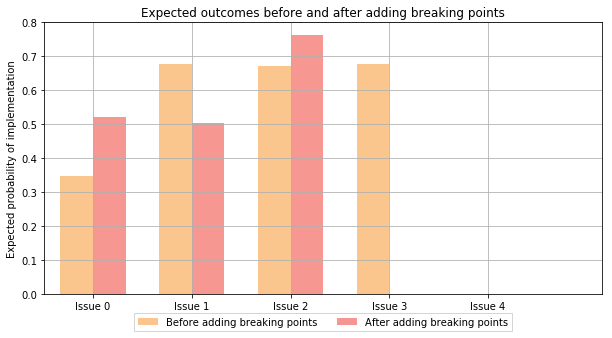

In [6]:
plot_bar_chart(pd.DataFrame([final_expected_outcomes, b_final_expected_outcomes]).T)

In [7]:
l_differences, l_total_diff, l_avg_diff = calculate_likelihood_diff(final_expected_outcomes, b_final_expected_outcomes)

print("Likelihoods changed by {}, with a total of {}, averaging {} per issue.".format(l_differences, l_total_diff, l_avg_diff))

Likelihoods changed by [ 0.1743112  -0.17231529  0.08960409 -0.67620957  0.        ], with a total of 1.1124401552782879, averaging 0.22248803105565756 per issue.


In [8]:
entropy = calculate_entropy(final_expected_outcomes)
b_entroy = calculate_entropy(b_final_expected_outcomes)

In [9]:
if entropy > b_entroy:
    print("Entropy decreased by {} from {} to {}".format(entropy-b_entroy, entropy, b_entroy))
elif entropy < b_entroy:
    print("Entropy increased by {} from {} to {}".format(b_entroy - entropy, entropy, b_entroy))
else:
    print("Entropy remained unchanged at {}".format(entropy))

Entropy decreased by 0.1740468395272421 from 0.7324654171140244 to 0.5584185775867823


In [10]:
entropy = calculate_entropy([0.5, 0.5, 0.5, 0.5, 0.5])
b_entroy = calculate_entropy([1, 1, 1, 1, 1])

In [11]:
if entropy > b_entroy:
    print("Entropy decreased by {} from {} to {}".format(entropy-b_entroy, entropy, b_entroy))
elif entropy < b_entroy:
    print("Entropy increased by {} from {} to {}".format(b_entroy - entropy, entropy, b_entroy))
else:
    print("Entropy remained unchanged at {}".format(entropy))

Entropy decreased by 1.0 from 1.0 to 0.0
